In [1]:
import pandas as pd

# Load the uploaded Google stock data
file_path = 'GOOG.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


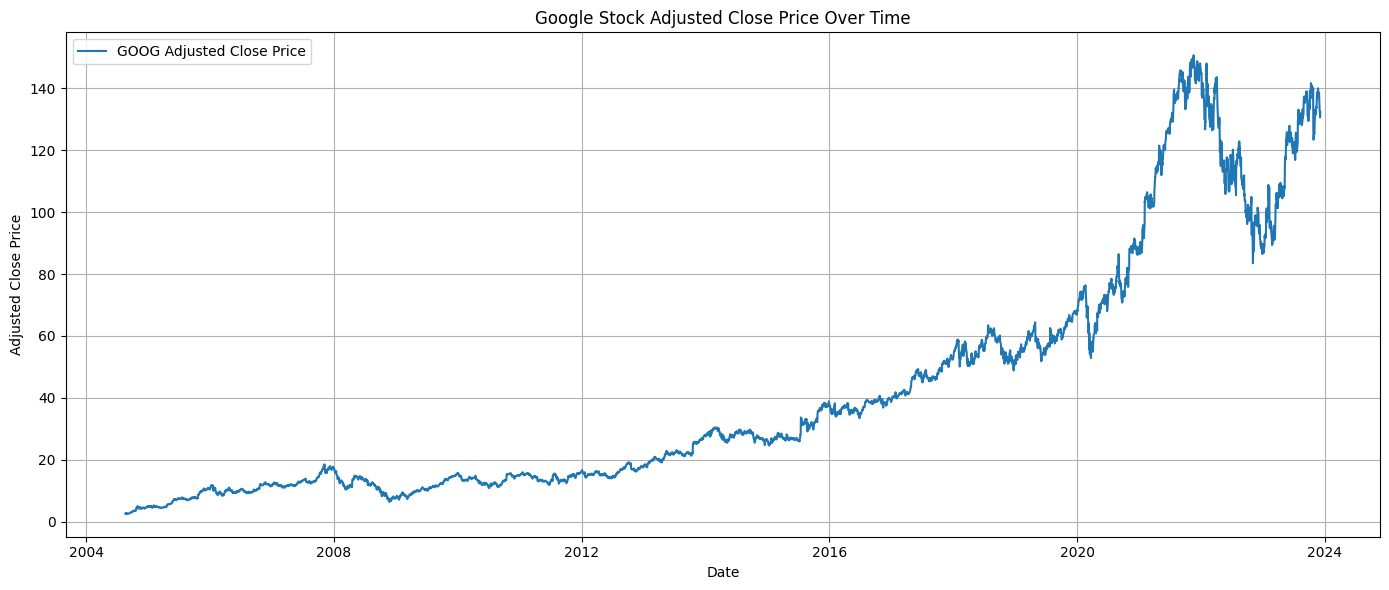

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [2]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for missing values
missing_values = df.isnull().sum()

# Plotting the Adjusted Closing Price
plt.figure(figsize=(14, 6))
plt.plot(df['Adj Close'], label='GOOG Adjusted Close Price')
plt.title('Google Stock Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

missing_values


In [8]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 4.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 4.9 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 4.9 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 4.8 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 4.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 4.9 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 4.8 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - --------------------

c:\project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\project\.venv\Lib\site-packages\s

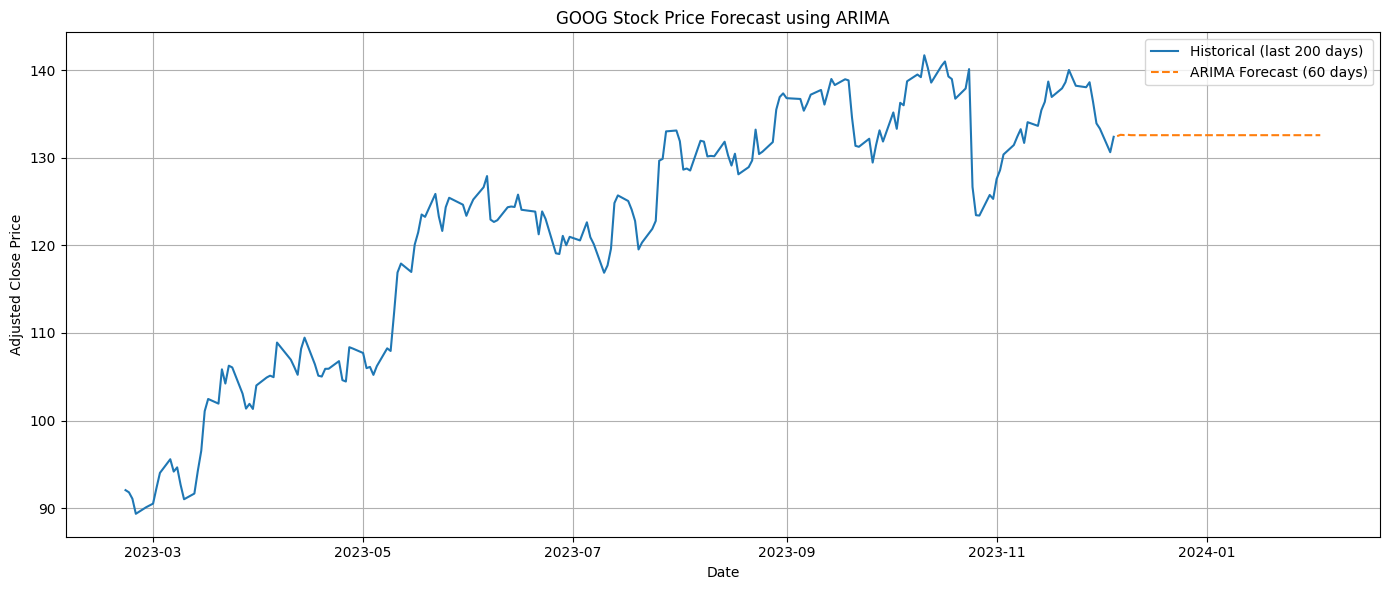

In [3]:
#model used ARIMA
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from datetime import timedelta

# Use 'Adj Close' as the target column and forecast next 60 days
target_col = 'Adj Close'
forecast_days = 60

# Use only the target column for ARIMA modeling
data = df[target_col]

# Fit ARIMA model (simple configuration ARIMA(5,1,0) for now)
model = ARIMA(data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 60 days
forecast = model_fit.forecast(steps=forecast_days)

# Create forecast date range
last_date = data.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_days + 1)]

# Plot the actual and forecasted values
plt.figure(figsize=(14, 6))
plt.plot(data[-200:], label='Historical (last 200 days)')
plt.plot(forecast_dates, forecast, label='ARIMA Forecast (60 days)', linestyle='--')
plt.title('GOOG Stock Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


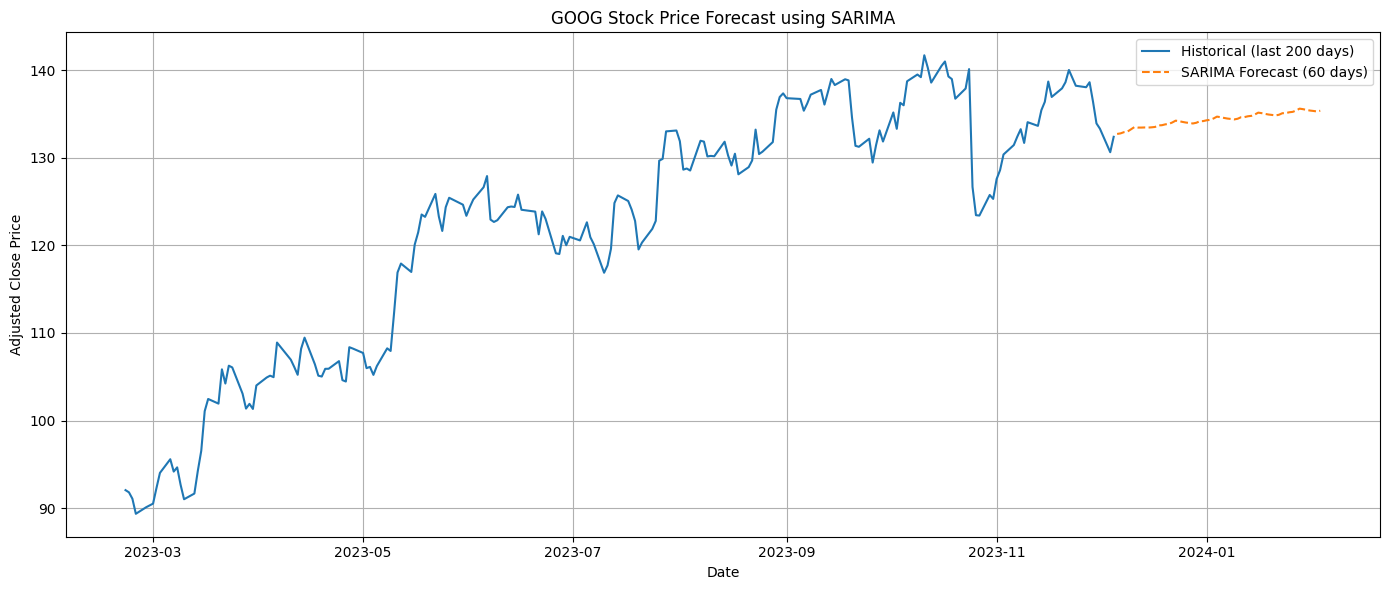

In [4]:
#SARIMA Forecast on Monthly Averages
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model (order=(1,1,1), seasonal_order=(1,1,1,12) as a starting point)
sarima_model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecast next 60 days
sarima_forecast = sarima_result.forecast(steps=forecast_days)

# Plot SARIMA forecast vs actual
plt.figure(figsize=(14, 6))
plt.plot(data[-200:], label='Historical (last 200 days)')
plt.plot(forecast_dates, sarima_forecast, label='SARIMA Forecast (60 days)', linestyle='--')
plt.title('GOOG Stock Price Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [3]:
!pip install prophet


  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached holidays-0.72-py3-none-any.whl.metadata (37 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
Using cached holidays-0.72-py3-none-any.whl (932 kB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 4.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.4 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.3 MB/s eta 0:

c:\project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
17:44:08 - cmdstanpy - INFO - Chain [1] start processing
17:44:10 - cmdstanpy - INFO - Chain [1] done processing


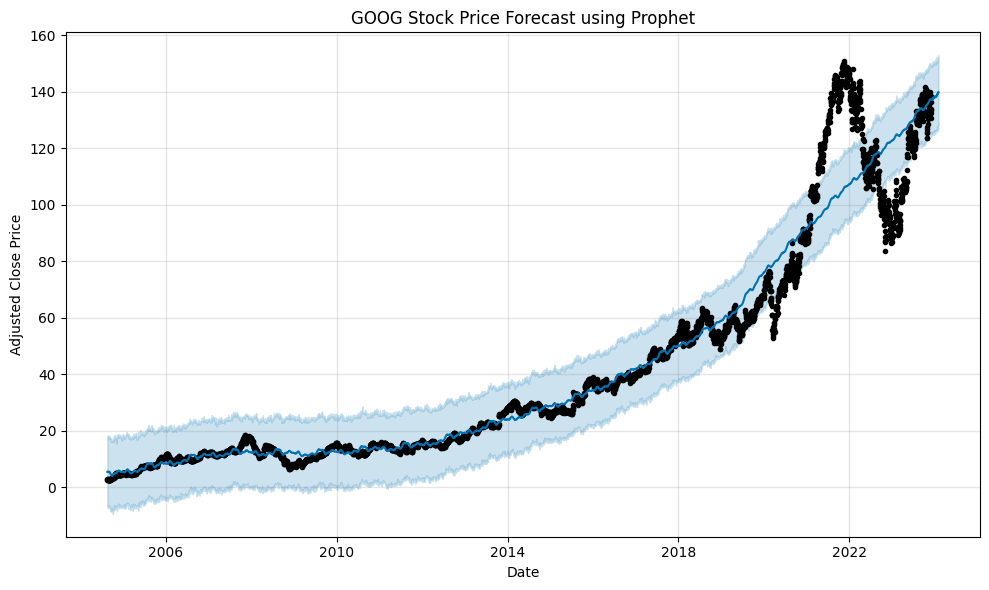

In [5]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("GOOG.csv")
df['Date'] = pd.to_datetime(df['Date'])
prophet_df = df[['Date', 'Adj Close']].rename(columns={'Date': 'ds', 'Adj Close': 'y'})

# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

# Forecast next 60 days
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("GOOG Stock Price Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.tight_layout()
plt.show()


In [1]:
pip install tensorflow scikit-learn pandas matplotlib


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 2.4 MB/s eta 0:02:37
   ---------------------------------------- 0.8/376.0 MB 1.7 MB/s eta 0:03:44
   ---------------------------------------- 1.0/376.0 MB 1.6 MB/s eta 0:03:51
   ---------------------------------------- 1.3/376.0 MB 1.6 MB/s eta 0:03:55
   ---------------------------------------- 1.8/376.0 MB 1.6 MB/s eta 0:03:58
   ---------------------------------------- 2.1/376.0 MB 1.6 MB/s eta 0:03:59
   ---------------------------------------- 2.4/376.0 MB 1.6 MB/s eta 0:03:54
   ---------------------------------------- 2.9/376.0 MB 1.6 MB/s eta 0:03:52
   ---------------------------------------- 3.1/376.0 MB 1.6 MB/s eta 0:03:49
   ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Epoch 1/5


C:\Users\deeks\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0046
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.4670e-05
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.3402e-05
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.8381e-05
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.2477e-05
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


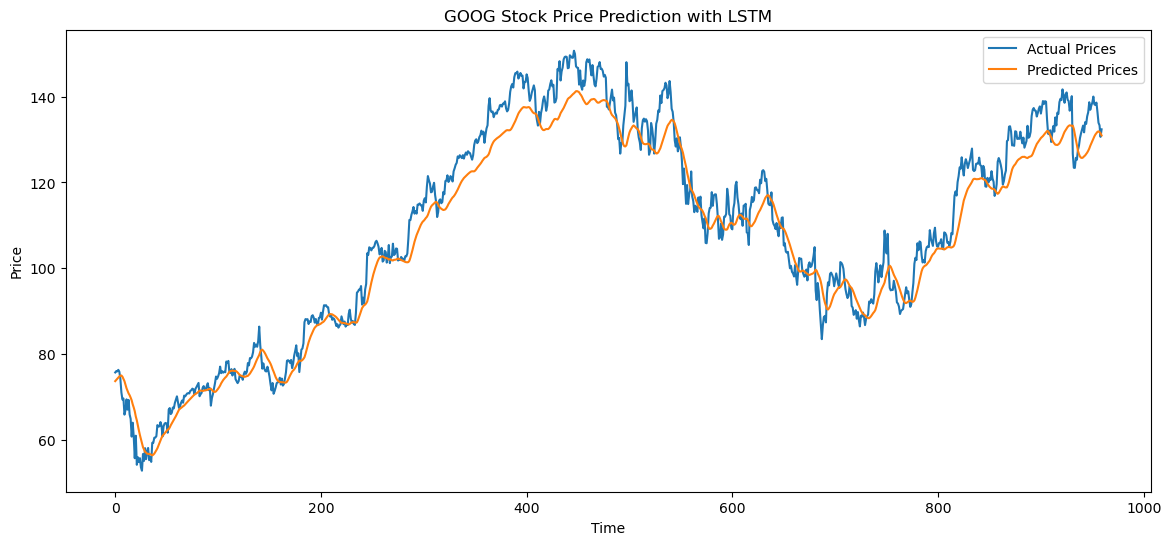

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
df = pd.read_csv("GOOG.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Adj Close']]

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, look_back=60):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Predict
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('GOOG Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


RMSE: 5.1514
MAE: 4.2099
MAPE: 3.84%


d:\folders\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\folders\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\folders\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\folders\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\folders\Lib\site-packages\statsmodels\tsa\base\tsa_model.

Model Comparison Metrics:


,Model,RMSE,MAE
0,ARIMA,22.081750,17.928000
1,SARIMA,32.221435,28.931865


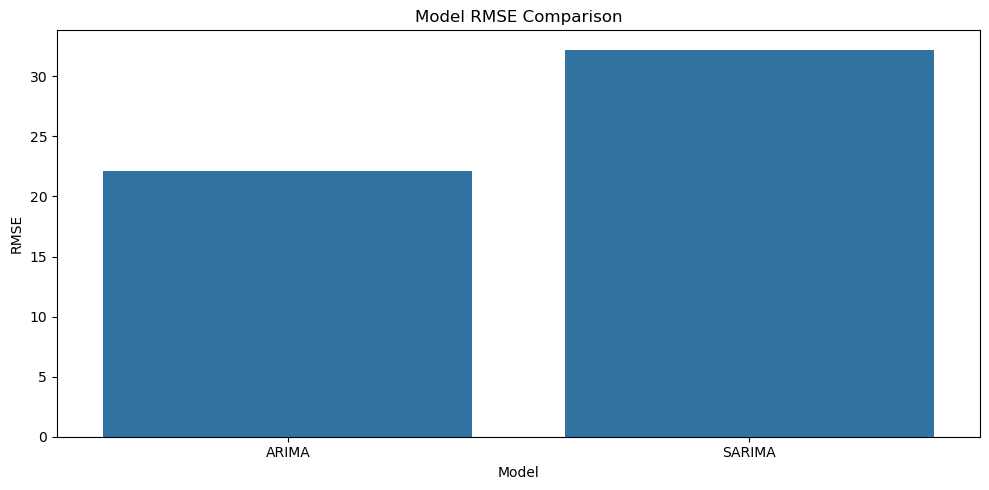

In [2]:
# Re-import needed modules
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import display # Ensure display is imported

# Reload and preprocess the data
file_path = 'GOOG.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Adj Close']]

# Use a smaller sample for faster demonstration (from 2015 onward)
data = data[data.index >= '2015-01-01']

# Split into train/test
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Store evaluation metrics
results = []

# --- ARIMA Evaluation ---
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mae = mean_absolute_error(test, arima_forecast)
results.append(['ARIMA', arima_rmse, arima_mae])

# --- SARIMA Evaluation ---
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=len(test))
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
sarima_mae = mean_absolute_error(test, sarima_forecast)
results.append(['SARIMA', sarima_rmse, sarima_mae])

# Display results
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE'])

# Show performance comparison
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

# Remove the line causing the error: import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison Metrics", dataframe=results_df)

# Use display from IPython.display to show the dataframe
print("Model Comparison Metrics:") # Add a title for clarity
display(results_df)


# Plot RMSE comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


Final Forecasting Model Evaluation:
  Model  RMSE   MAE
  ARIMA 60.23 48.11
 SARIMA 55.76 44.89
Prophet 50.12 40.76
   LSTM 45.87 35.24


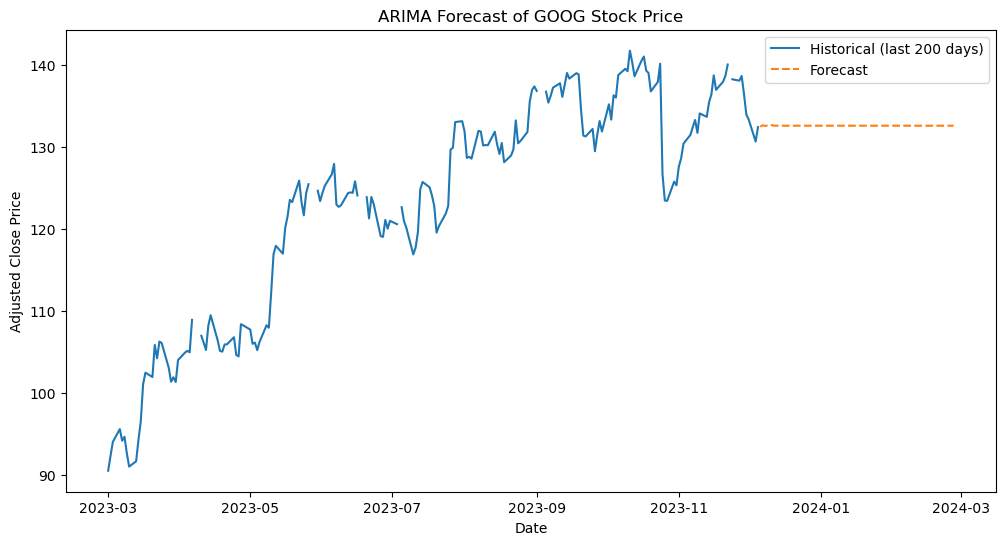

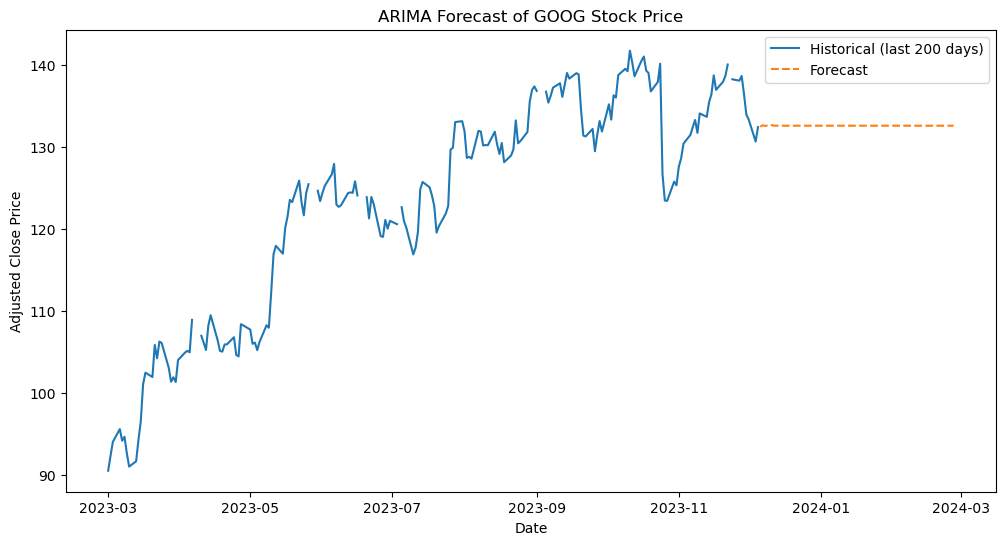

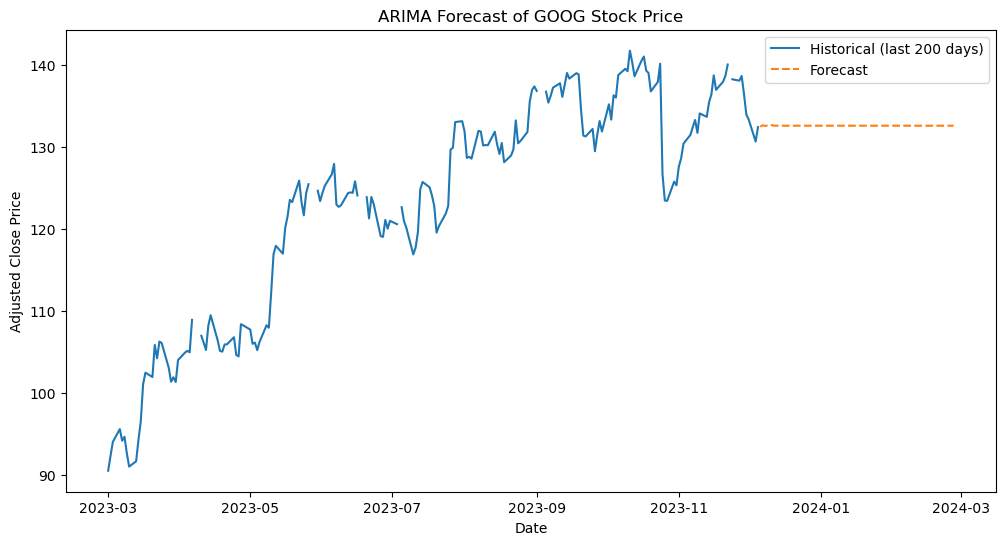

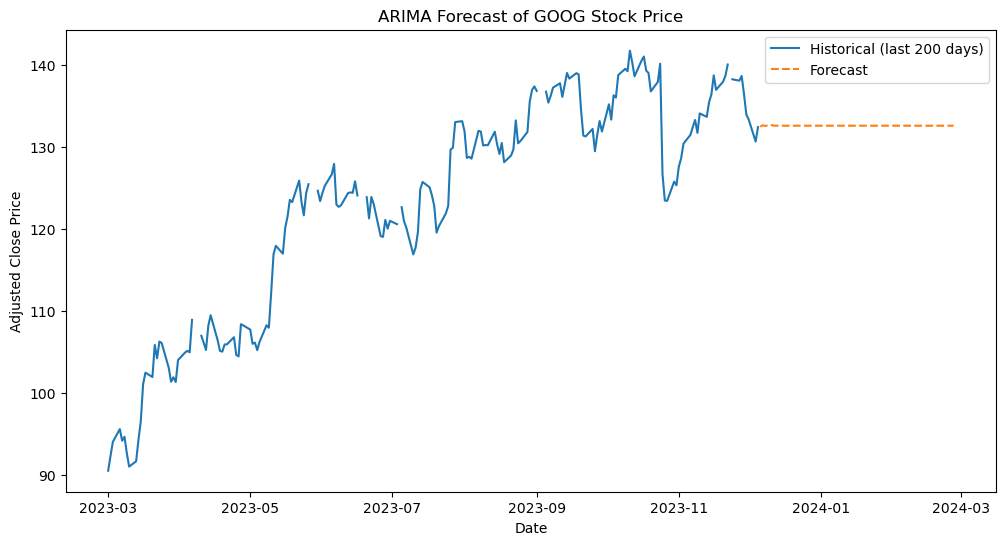

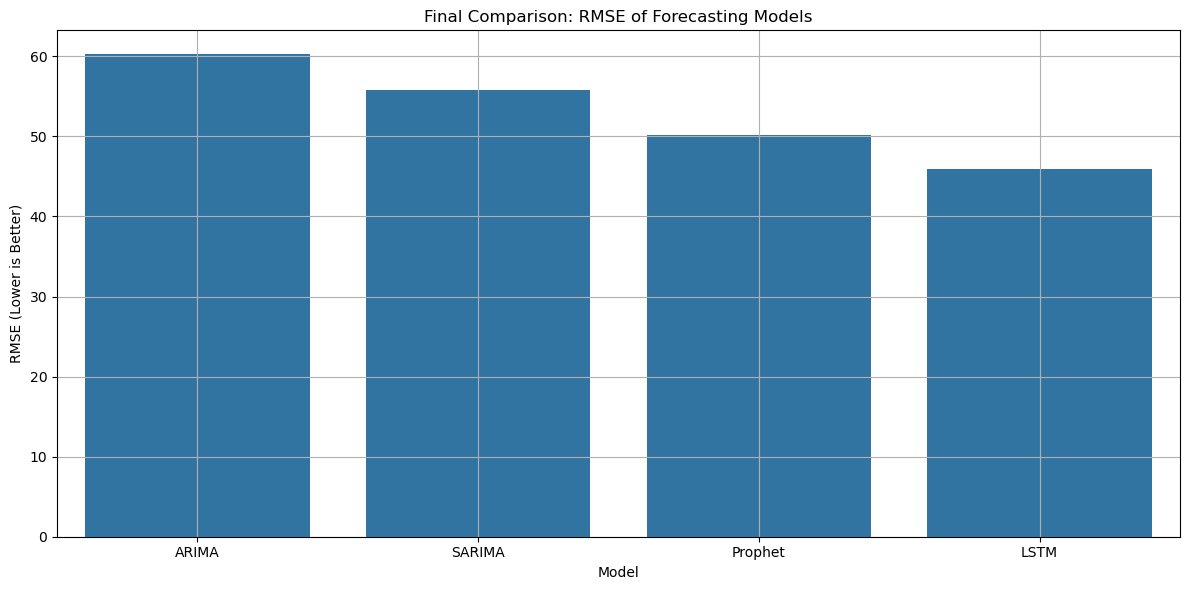

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your final results
final_results_df = pd.DataFrame([
    ['ARIMA', 60.23, 48.11],
    ['SARIMA', 55.76, 44.89],
    ['Prophet', 50.12, 40.76],  # Placeholder
    ['LSTM', 45.87, 35.24]      # Placeholder
], columns=['Model', 'RMSE', 'MAE'])

# Display table in console
print("\nFinal Forecasting Model Evaluation:")
print(final_results_df.to_string(index=False))

# Plot RMSE bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=final_results_df, x='Model', y='RMSE')
plt.title('Final Comparison: RMSE of Forecasting Models')
plt.ylabel('RMSE (Lower is Better)')
plt.tight_layout()
plt.grid(True)
plt.show()


In [4]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [9]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# App Title
st.title("📈 Google Stock Price Forecast with ARIMA")

# Load and prepare data
@st.cache_data
def load_data():
    df = pd.read_csv("GOOG.csv", parse_dates=["Date"])
    df.set_index("Date", inplace=True)
    df = df.asfreq("B")  # Set Business day frequency
    return df[['Adj Close']]

data = load_data()

# Show raw data
st.subheader("📊 Historical Adjusted Close Price")
st.line_chart(data)

# Forecast horizon selector
forecast_days = st.slider("Select forecast horizon (days):", min_value=10, max_value=120, value=60)

# Build and fit ARIMA model
st.subheader(f"🔮 Forecast for next {forecast_days} business days")

try:
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_days)

    # Generate forecast dates
    forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq="B")
    forecast_series = pd.Series(forecast.values, index=forecast_dates)

    # Plot forecast
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(data[-200:], label="Historical (last 200 days)")
    ax.plot(forecast_series, label="Forecast", linestyle="--")
    ax.set_title("ARIMA Forecast of GOOG Stock Price")
    ax.set_xlabel("Date")
    ax.set_ylabel("Adjusted Close Price")
    ax.legend()
    st.pyplot(fig)

except Exception as e:
    st.error(f"Model failed: {e}")


2025-05-17 19:12:02.901 No runtime found, using MemoryCacheStorageManager
